In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/drive/MyDrive/sonar.csv',header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='60', ylabel='count'>

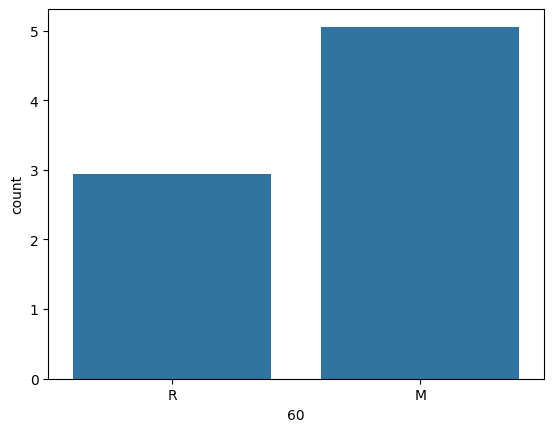

In [7]:
sns.countplot(x=df[60],data=df)

In [8]:
df[60] = df[60].map({'R': 0, 'M': 1})



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(60, axis=1)
y = df[60]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [13]:
# Initialize the models
logistic_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Train and evaluate each model
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": rf_model,
    "Support Vector Machine": svm_model
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    classification_rep = classification_report(y_test, y_pred)

    # Store the results
    results[model_name] = {
        "Accuracy": accuracy,
        "ROC AUC": roc_auc,
        "Classification Report": classification_rep
    }

results

{'Logistic Regression': {'Accuracy': 0.8095238095238095,
  'ROC AUC': 0.90625,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.70      0.88      0.78        16\n           1       0.91      0.77      0.83        26\n\n    accuracy                           0.81        42\n   macro avg       0.80      0.82      0.81        42\nweighted avg       0.83      0.81      0.81        42\n'},
 'Random Forest': {'Accuracy': 0.8571428571428571,
  'ROC AUC': 0.9447115384615384,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.78      0.88      0.82        16\n           1       0.92      0.85      0.88        26\n\n    accuracy                           0.86        42\n   macro avg       0.85      0.86      0.85        42\nweighted avg       0.86      0.86      0.86        42\n'},
 'Support Vector Machine': {'Accuracy': 0.8809523809523809,
  'ROC AUC': 0.9519230769230769,
  'Classific

In [14]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params, best_score

({'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200},
 0.8251336898395722)

In [15]:
# Train the best model with all data
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred_best = best_rf_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred_best)
final_classification_report = classification_report(y_test, y_pred_best)

print("Final Model Accuracy:", final_accuracy)
print("Final Classification Report:\n", final_classification_report)

Final Model Accuracy: 0.8095238095238095
Final Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.88      0.81      0.84        26

    accuracy                           0.81        42
   macro avg       0.80      0.81      0.80        42
weighted avg       0.82      0.81      0.81        42

